In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from scipy.signal import filtfilt
from refrtomo.raytrace import raytrace
from refrtomo.survey import *
from refrtomo.tomomatrix import *

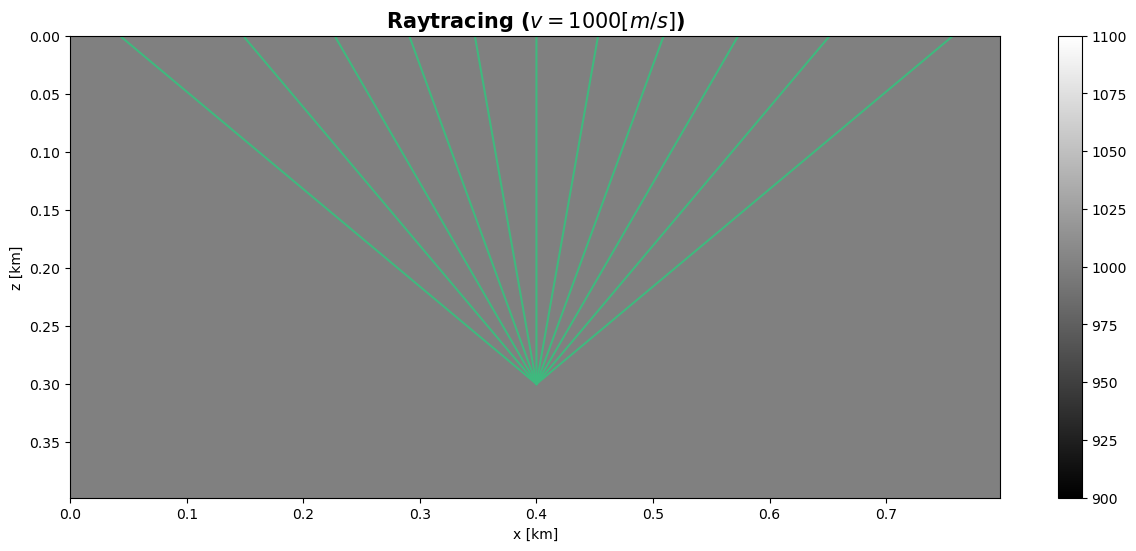

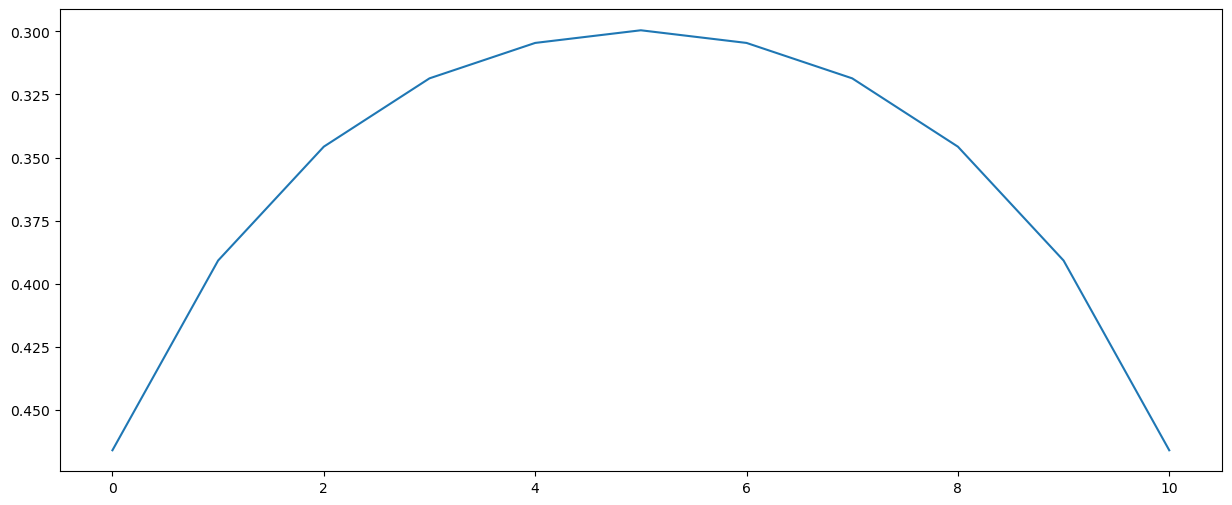

In [2]:
# Spatial axes (must be not smaller than 2!!!)
#nx, nz = 100, 50
#dx, dz = 8., 8. # OK
#nx, nz = 200, 100
#dx, dz = 4., 4. # OK
nx, nz = 400, 200
dx, dz = 2., 2. # OK

x = np.arange(nx) * dx
z = np.arange(nz) * dz

[zz, xx]= np.meshgrid(z, x, indexing='ij')

# Velocity model
v0 = 1000
vel = v0 + 0. * zz

# Slowness and its spatial derivatives
slowness = 1./vel;
[dsdz, dsdx] = np.gradient(slowness, dz, dx)

# Source location
ixs = nx//2
izs = 3*nz//4
source = [x[ixs], z[izs]] 

# Take off angles
thetas = np.arange(180-50, 180+51, 10)
#thetas = np.hstack([np.arange(180-50, 180, 10), np.arange(180+10, 180+51, 10)])

plt.figure(figsize=(15, 6))
plt.imshow(vel, extent=(x[0]/1000, x[-1]/1000, z[-1]/1000, z[0]/1000),  cmap='gray')
plt.xlabel('x [km]')
plt.ylabel('z [km]')
plt.title(r'Raytracing ($v=1000 [m/s]$)', fontsize=15, fontweight='bold')

# Vector of lengths
lmax, nl = 5e2, 500

# Raytrace
rays = raytrace(vel, x, z, dx, dz, lmax, nl, source, thetas, dzout=5.)[0]
for ray in rays:
    plt.plot(ray[:,0]/1000, ray[:,1]/1000, '#3FB97E')
plt.colorbar()
plt.axis('tight')

plt.figure(figsize=(15, 6))
plt.plot([ray[-1, -1] for ray in rays])
plt.gca().invert_yaxis();

In [3]:
# Check that straigh ray gives the same traveltime as the one from ray tracing
iray = 3*len(thetas)//4
dtot = np.sqrt((rays[iray][0, 0]-rays[iray][-1, 0])**2 + (rays[iray][0, 1]-rays[iray][-1, 1])**2)

ttot = rays[iray][:, -1]
print(f'Traveltime (from distances): {dtot / v0} , from raytracing {ttot[-1]}')

Traveltime (from distances): 0.3458723377968988 , from raytracing 0.345691382765531


(0.345691382765531, 0.34619544870310615, 346.19544870310614)

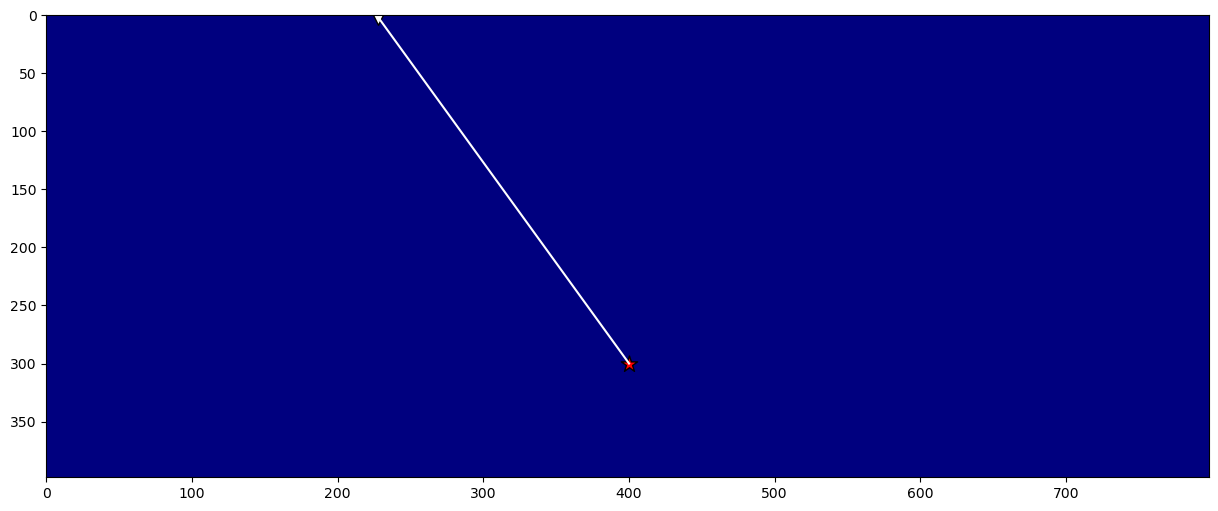

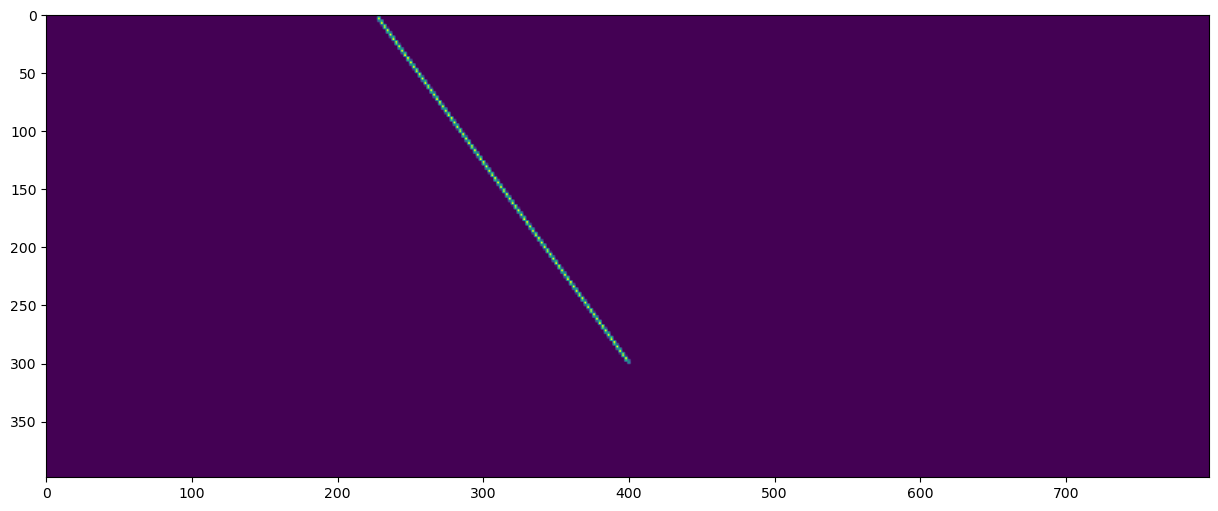

In [4]:
# Tomo matrix 1ray
iray = 3*len(thetas)//4

R = [raytrace_straight(rays[iray][i], rays[iray][i+1], dx, dz, 0., 0., nx, nz, x, z)[0] 
     for i in range(rays[iray].shape[0]-1)]
R = np.sum(R, axis=0)

plt.figure(figsize=(15, 6))
plt.imshow(vel.T, cmap='jet', extent = (x[0], x[-1], z[-1], z[0]))

plt.plot(rays[iray][:,0], rays[iray][:,1], 'w')
plt.scatter(rays[iray][0,0], rays[iray][0,1], marker='*', s=150, c='r', edgecolors='k')
plt.scatter(rays[iray][-1,0], rays[iray][-1,1], marker='v', s=200, c='w', edgecolors='k')
plt.axis('tight');

plt.figure(figsize=(15, 6))
plt.imshow(R.reshape(nx, nz).T, extent = (x[0], x[-1], z[-1], z[0]))
plt.axis('tight');

tobs = rays[iray][-1, -1]
tobs_R = R @ (1/vel.ravel())

tobs, tobs_R, np.sum(R)

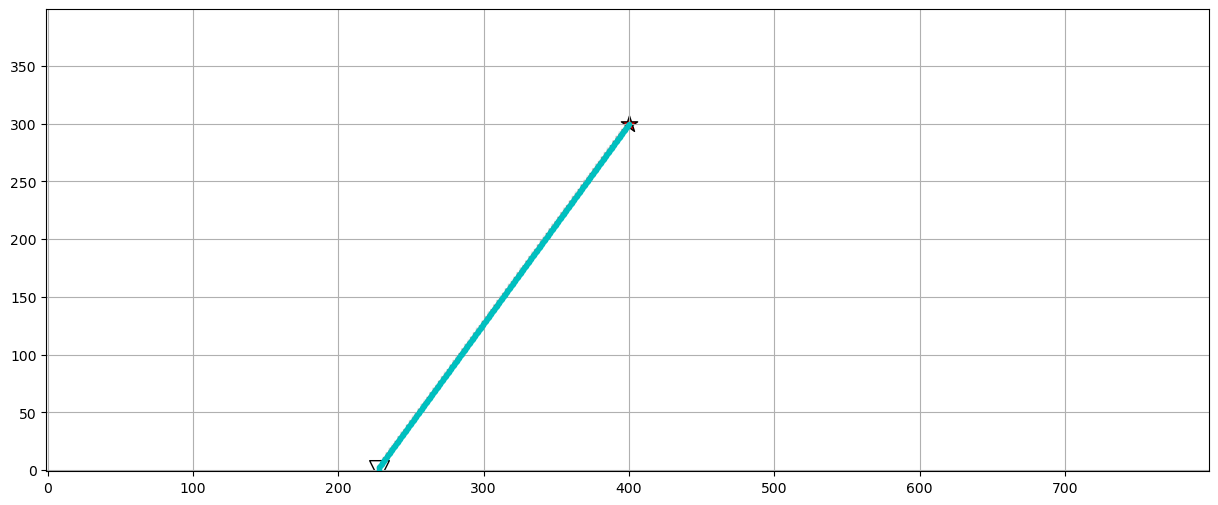

In [5]:
plt.figure(figsize=(15, 6))
plt.imshow(R.reshape(nx, nz).T, origin='lower', cmap='gray_r',
           extent=(x[0]-dx//2, x[-1]+dx//2, z[0]-dz//2, z[-1]+dz//2))
plt.scatter(rays[iray][0,0], rays[iray][0,1], marker='*', s=150, c='r', edgecolors='k')
plt.scatter(rays[iray][-1,0], rays[iray][-1,1], marker='v', s=200, c='w', edgecolors='k')
plt.plot(rays[iray][:,0], rays[iray][:,1], '.-c')
plt.grid('on', which='both')
plt.axis('tight');

(0.345691382765531, 0.3466151734127798, 346.6151734127799)

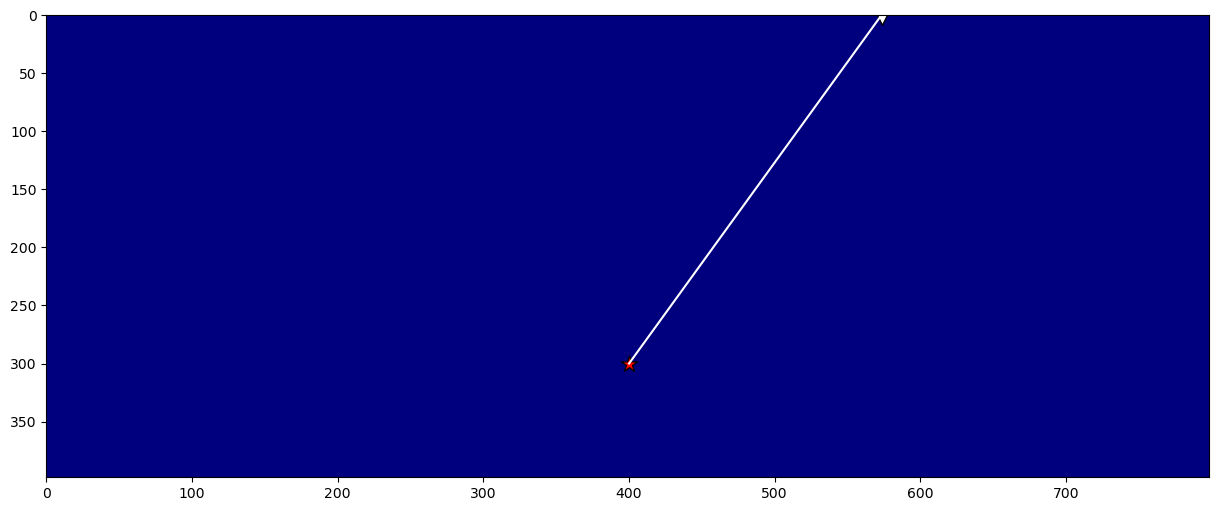

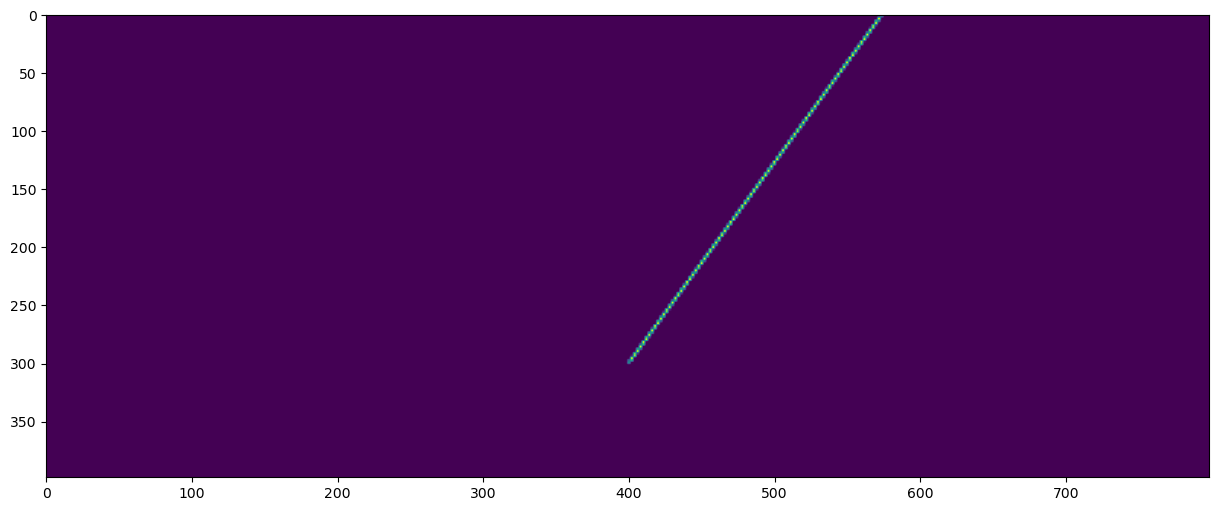

In [6]:
# Tomo matrix 1ray
iray = 1*len(thetas)//4

R = [raytrace_straight(rays[iray][i], rays[iray][i+1], dx, dz, 0., 0., nx, nz, x, z)[0] 
     for i in range(rays[iray].shape[0]-1)]
R = np.sum(R, axis=0)

plt.figure(figsize=(15, 6))
plt.imshow(vel.T, cmap='jet', extent = (x[0], x[-1], z[-1], z[0]))

plt.plot(rays[iray][:,0], rays[iray][:,1], 'w')
plt.scatter(rays[iray][0,0], rays[iray][0,1], marker='*', s=150, c='r', edgecolors='k')
plt.scatter(rays[iray][-1,0], rays[iray][-1,1], marker='v', s=200, c='w', edgecolors='k')
plt.axis('tight');

plt.figure(figsize=(15, 6))
plt.imshow(R.reshape(nx, nz).T, extent = (x[0], x[-1], z[-1], z[0]))
plt.axis('tight');

tobs = rays[iray][-1, -1]
tobs_R = R @ (1/vel.ravel())

tobs, tobs_R, np.sum(R)

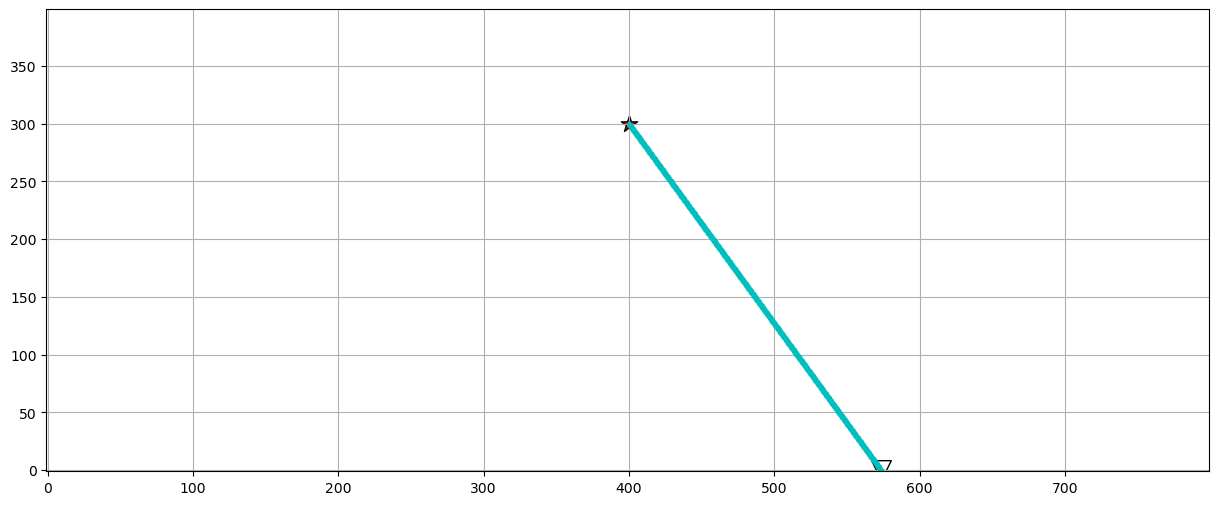

In [7]:
plt.figure(figsize=(15, 6))
plt.imshow(R.reshape(nx, nz).T, origin='lower', cmap='gray_r',
           extent=(x[0]-dx//2, x[-1]+dx//2, z[0]-dz//2, z[-1]+dz//2))
plt.scatter(rays[iray][0,0], rays[iray][0,1], marker='*', s=150, c='r', edgecolors='k')
plt.scatter(rays[iray][-1,0], rays[iray][-1,1], marker='v', s=200, c='w', edgecolors='k')
plt.plot(rays[iray][:,0], rays[iray][:,1], '.-c')
plt.grid('on', which='both')
plt.axis('tight');

(0.29959919839679355, 0.30005613424634897, 300.0561342463488)

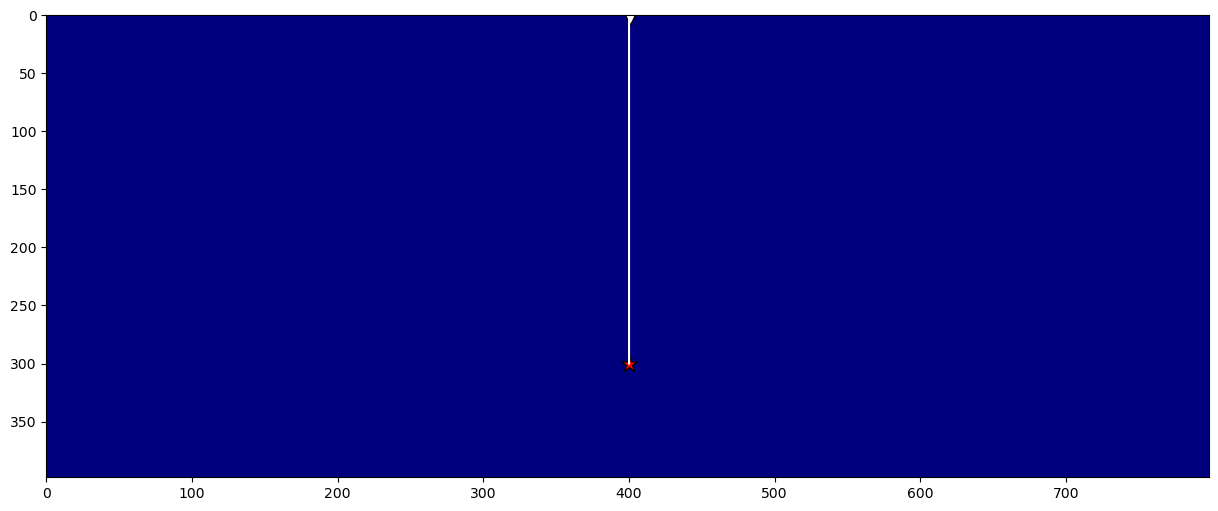

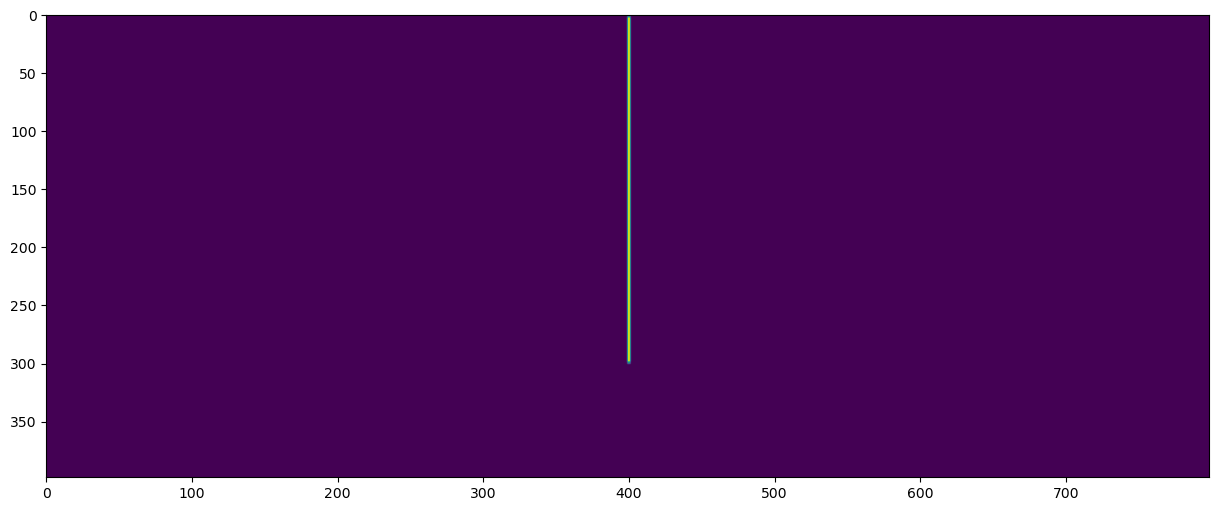

In [8]:
# Tomo matrix 1ray
iray = len(thetas)//2

R = [raytrace_straight(rays[iray][i], rays[iray][i+1], dx, dz, 0., 0., nx, nz, x, z)[0] 
     for i in range(rays[iray].shape[0]-1)]
R = np.sum(R, axis=0)

plt.figure(figsize=(15, 6))
plt.imshow(vel.T, cmap='jet', extent = (x[0], x[-1], z[-1], z[0]))

plt.plot(rays[iray][:,0], rays[iray][:,1], 'w')
plt.scatter(rays[iray][0,0], rays[iray][0,1], marker='*', s=150, c='r', edgecolors='k')
plt.scatter(rays[iray][-1,0], rays[iray][-1,1], marker='v', s=200, c='w', edgecolors='k')
plt.axis('tight');

plt.figure(figsize=(15, 6))
plt.imshow(R.reshape(nx, nz).T, extent = (x[0], x[-1], z[-1], z[0]))
plt.axis('tight');

tobs = rays[iray][-1, -1]
tobs_R = R @ (1/vel.ravel())

tobs, tobs_R, np.sum(R)

(11, 80000)


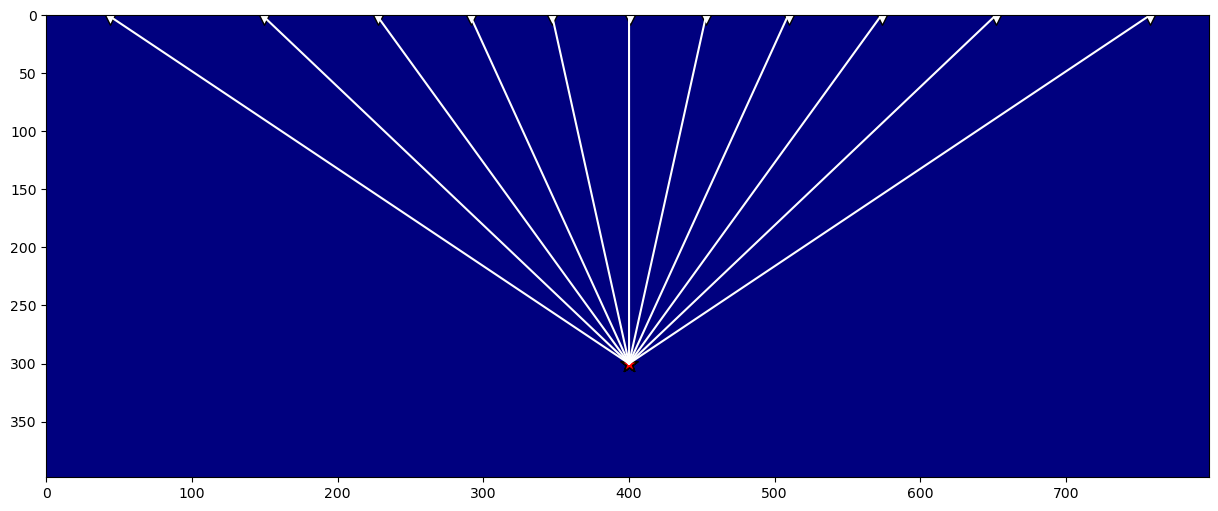

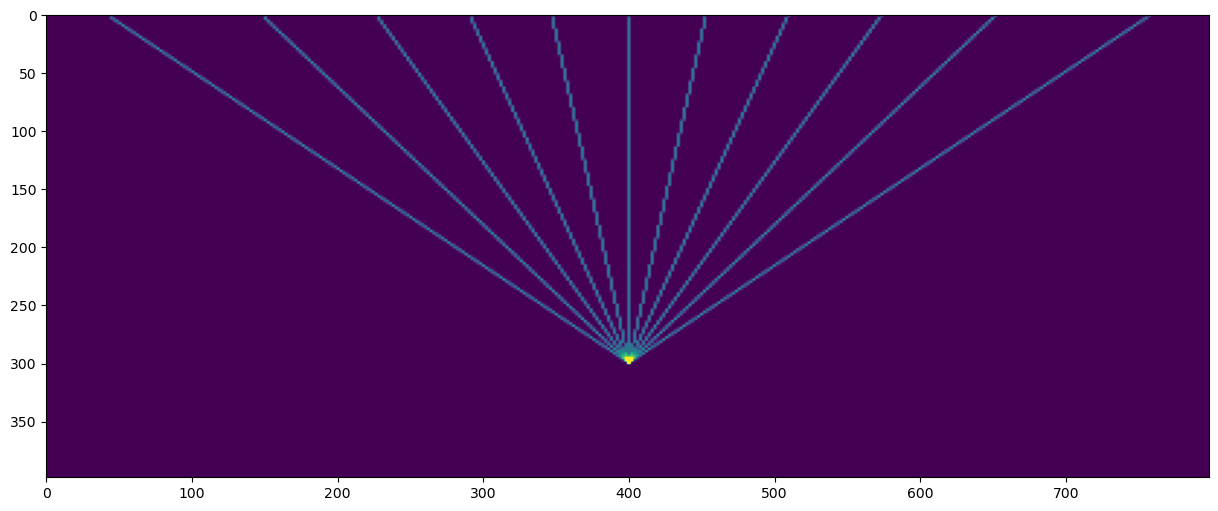

In [9]:
# Tomo matrix all rays
R = []
Rcove = np.zeros(nx*nz)
for ray in rays:
    R_ = [raytrace_straight(ray[i], ray[i+1], dx, dz, 0., 0., nx, nz, x, z)[0] 
         for i in range(ray.shape[0]-1)]
    R.append(np.sum(R_, axis=0))
    Rcove = Rcove + np.sum(R_, axis=0)
    
R = np.vstack(R)
print(R.shape)

plt.figure(figsize=(15, 6))
plt.imshow(vel.T, cmap='jet', extent = (x[0], x[-1], z[-1], z[0]))

for ray in rays:
    plt.plot(ray[:,0], ray[:,1], 'w')
    plt.scatter(ray[0,0], ray[0,1], marker='*', s=150, c='r', edgecolors='k')
    plt.scatter(ray[-1,0], ray[-1,1], marker='v', s=200, c='w', edgecolors='k')
    plt.axis('tight');

plt.figure(figsize=(15, 6))
plt.imshow(Rcove.reshape(nx, nz).T, vmin=0, vmax=5, extent = (x[0], x[-1], z[-1], z[0]))
plt.axis('tight');

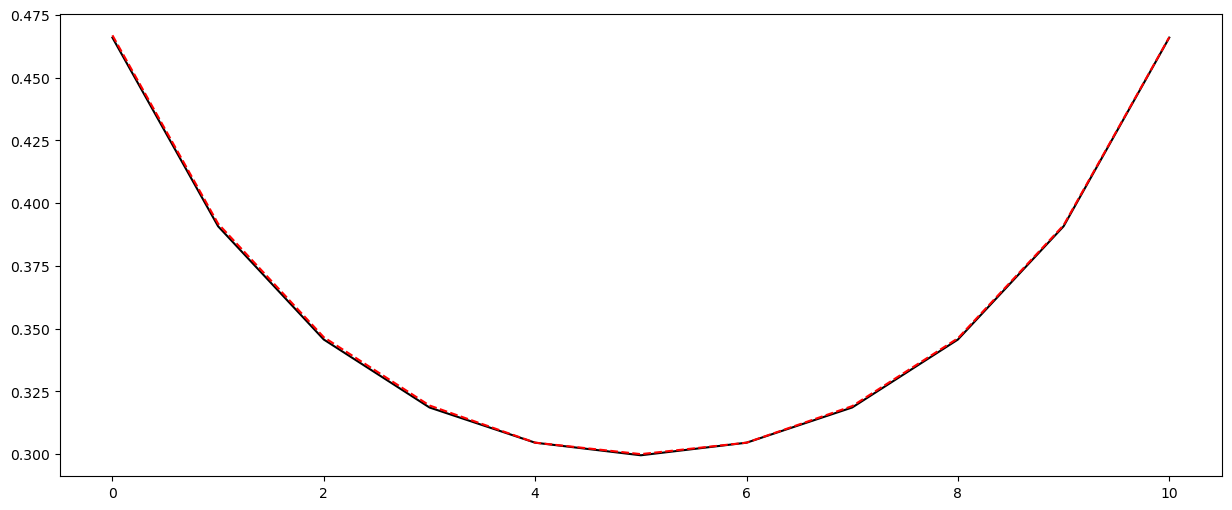

In [10]:
tobs_R = R @ (1/vel.ravel())

plt.figure(figsize=(15, 6))
plt.plot([ray[-1, -1] for ray in rays], 'k')
plt.plot(tobs_R, '--r')

In [11]:
# Grid specification
nx, nz = 100, 110
ox, oz = 0., 0.
dx, dz = 2., 2.
x = ox + dx * np.arange(nx) + dx/2
z = oz + dz * np.arange(nz) + dz/2

# Model
vback = 1000
vel = vback * np.ones((nx, nz))

Numerical traveltime 0.2141074496602115, Analytical traveltime: 0.2141074496602115, Diff: 0.0
Numerical traveltime 0.21062288574606508, Analytical traveltime: 0.21062288574606514, Diff: -5.551115123125783e-17
Numerical traveltime 0.20756203891848818, Analytical traveltime: 0.20756203891848818, Diff: 0.0
Numerical traveltime 0.20494389476146882, Analytical traveltime: 0.20494389476146882, Diff: 0.0
Numerical traveltime 0.20278560106674245, Analytical traveltime: 0.2027856010667424, Diff: 5.551115123125783e-17
Numerical traveltime 0.2011019641873246, Analytical traveltime: 0.20110196418732462, Diff: -2.7755575615628914e-17
Numerical traveltime 0.19990497742677646, Analytical traveltime: 0.19990497742677643, Diff: 2.7755575615628914e-17
Numerical traveltime 0.19920341362536934, Analytical traveltime: 0.1992034136253694, Diff: -5.551115123125783e-17
Numerical traveltime 0.19900251254695245, Analytical traveltime: 0.19900251254695253, Diff: -8.326672684688674e-17
Numerical traveltime 0.1993

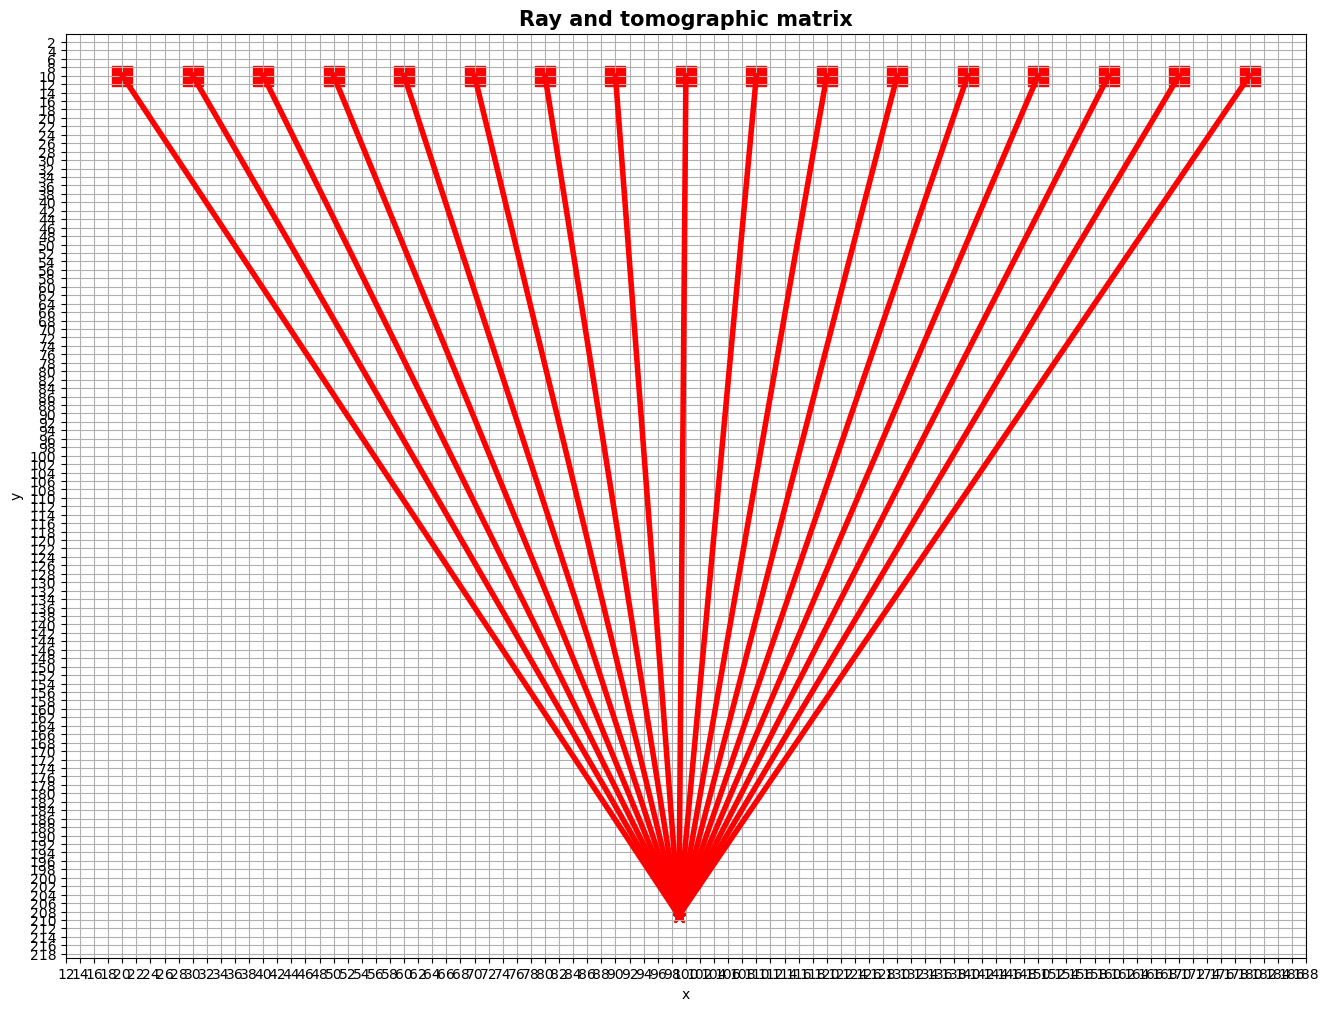

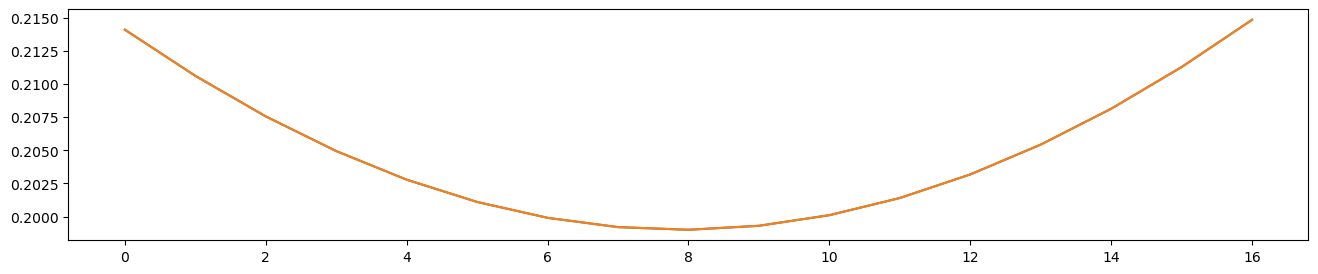

In [12]:
rx = np.arange(20, x[-1]-18, 10)
travs = np.zeros(len(rx))
travs_ana = np.zeros(len(rx))

plt.figure(figsize=(16, 12))
for irx, rx_ in enumerate(rx):
    # Source and receiver
    s = [x[-1]//2, z[-1]-10]
    r = [rx_, 10]

    # Find analytical expression of straigt line
    #rayx, rayz = straigh_ray(s, r)

    # Compute tomographic matrix
    L, c, v = raytrace_straight(s, r, dx, dz, ox, oz, nx, nz, x, z)

    plt.scatter(s[0], s[1], c='r', s=100, marker='*')
    plt.scatter(r[0], r[1], c='r', s=200, marker='s')
    plt.plot((r[0],s[0]), (r[1],s[1]), c='r', lw=4)
    
    # Create slowness model and compute traveltime from equation 2
    slown = (1. / vel).ravel()
    trav = L.reshape(1, -1) @ slown

    # Analytical traveltime
    trav_ana = sqrt((s[0]-r[0])**2 + (s[1]-r[1])**2) / vback

    print(f'Numerical traveltime {trav[0]}, Analytical traveltime: {trav_ana}, Diff: {trav[0]-trav_ana}')
    
    travs[irx] = trav
    travs_ana[irx] = trav_ana
    
plt.xticks(x-dx//2)
plt.yticks(z-dx//2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ray and tomographic matrix', fontsize=15, fontweight='bold')
plt.grid('on', which='both')
plt.axis('tight');
plt.gca().invert_yaxis()

plt.figure(figsize=(16, 3))
plt.plot(travs)
plt.plot(travs_ana);